In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels as sm
import statistics
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [8]:
df = pd.read_csv("datasets/NewHouseRegistrations_Ireland.csv", squeeze=True)

In [9]:
df.head()

,Year,NewHouseRegistrations
0,1978,3781
1,1979,5565
2,1980,9609
3,1981,10785
4,1982,9448


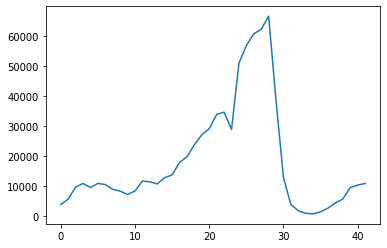

In [13]:
plt.plot(df.NewHouseRegistrations)

In [36]:
import pmdarima as pm
pm.arima.ndiffs(df.NewHouseRegistrations)

0

In [19]:
df['mydiff'] = df.NewHouseRegistrations.diff()
plt.plot(df.mydiff)

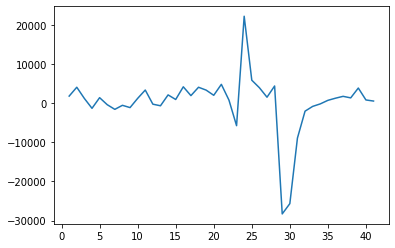

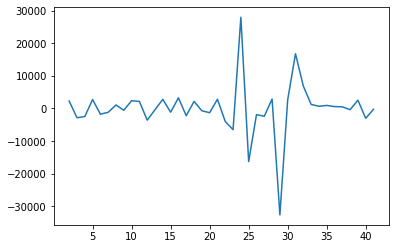

In [21]:
df['mydiff2'] = df.mydiff.diff()
plt.plot(df.mydiff2)

In [27]:
df = df.fillna(0)

In [28]:
df.isna().sum()

Year                     0
NewHouseRegistrations    0
diff                     0
mydiff                   0
mydiff2                  0
dtype: int64

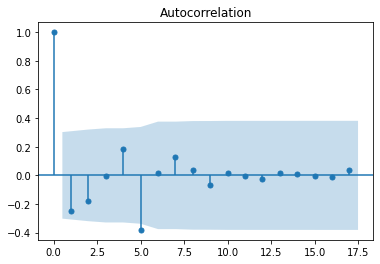

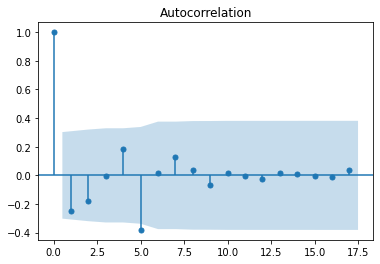

In [29]:
plot_acf(df.mydiff2)

/Users/raulsainz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


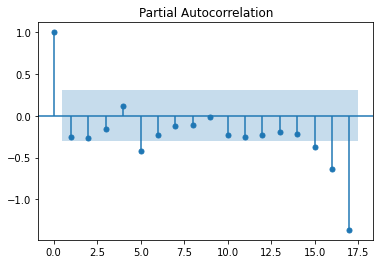

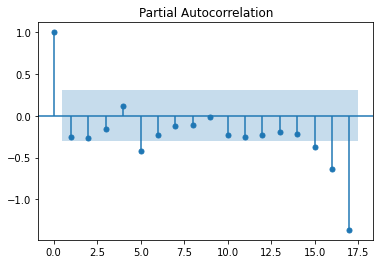

In [30]:
plot_pacf(df.mydiff2)

In [32]:
arima1 = ARIMA(df.NewHouseRegistrations,order=(5,2,5)).fit(transparams=False)
print(arima1.summary())

/Users/raulsainz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
                                ARIMA Model Results                                 
Dep. Variable:     D2.NewHouseRegistrations   No. Observation

In [33]:
arima1.predict()

4       195.004563
5      1321.367281
6       230.395796
7      -584.600883
8      1065.496966
9      1579.248077
10     -190.990365
11     -716.425224
12    -1366.122074
13       34.786988
14     1280.339621
15    -1651.218434
16    -2069.294030
17     -955.343666
18      300.641908
19    -2445.298619
20    -1714.564562
21    -2566.368811
22     -963.464514
23      388.384090
24     2426.588558
25   -11060.852357
26    -4166.624324
27      313.606341
28     5760.668338
29   -12196.069202
30    14344.050943
31    14714.837263
32     4918.160022
33    -3022.122428
34     4548.991337
35     4018.033255
36    -4354.262493
37    -5331.018372
38    -2890.091237
39     2634.278671
40      448.033525
41    -4101.573921
dtype: float64

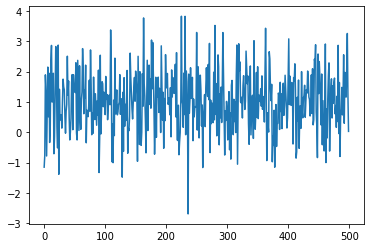

In [44]:
noise = np.random.normal(loc=1,scale=1,size=500)
plt.plot(noise)

(array([  1.,   1.,  20.,  42.,  93., 138., 107.,  64.,  25.,   9.]),
 array([-2.68869575, -2.03753875, -1.38638175, -0.73522475, -0.08406776,
         0.56708924,  1.21824624,  1.86940324,  2.52056023,  3.17171723,
         3.82287423]),
 <BarContainer object of 10 artists>)

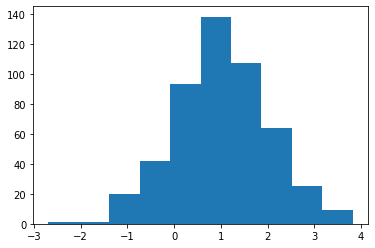

In [45]:
plt.hist(noise)

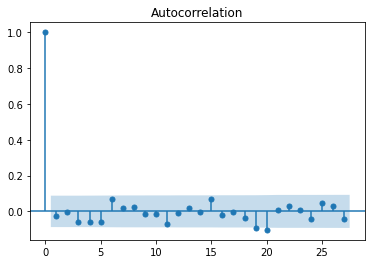

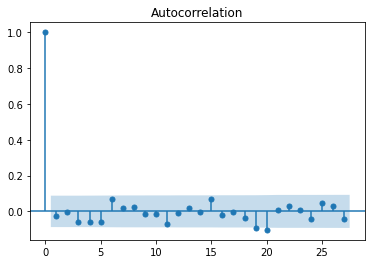

In [46]:
plot_acf(noise)

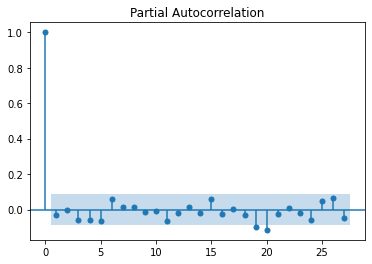

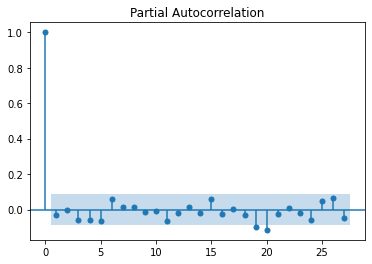

In [47]:
plot_pacf(noise)